# Получение функции

In [1]:
tasks = {
    Sin[2*x^3]^2/x^3
    , (x^2 - 4)*Sin[(Pi*(x^2))/6] / (x^2 - 1)
    , Sqrt[Abs[3*x^3 + 2*x^2 - 10*x]] / (4*x)
    , 1/2 * Log[Sqrt[x^2 + 1] / Sqrt[x^2 - 1]] - 15*x^2
    , (x^3 - x^2 - x + 1)^(1/3) / Tan[x]
    , 2*Log[(x - 1) / x] + 1
    , Log[x - 1] / (x - 1)^2
};

NameError: name 'Sin' is not defined

In [2]:
getVariantForNumber[number_, variationsQuo_]:=(
    Module[{t},
        t = Mod[number , variationsQuo];
        If[t != 0
                , t
                , variationsQuo
            ]
    ]
)

SyntaxError: invalid syntax (<ipython-input-2-d0493f2e73d3>, line 1)

In [3]:
Table[Plot[tasks[[i]], {x, -10, 10}], {i, 1, Length[tasks]}]

NameError: name 'Table' is not defined

In [4]:
yourNumber = 13;
numberOfYourTask = getVariantForNumber[yourNumber, Length[tasks]];
Print["Number of your task: ", numberOfYourTask]

NameError: name 'getVariantForNumber' is not defined

In [5]:
f[y_] := tasks[[numberOfYourTask]]/.x->y;

SyntaxError: invalid syntax (<ipython-input-5-8950adbf08ac>, line 1)

# График

In [7]:
Plot[f[x], {x, 0, 7}, PlotRange->{-0.5,0.5}]

SyntaxError: invalid syntax (<ipython-input-7-3ce88bcb0393>, line 1)

# Область определения

$D: x>1$

# Проверка на чётность/нечётность

In [9]:
even = TautologyQ[f[x] == f[-x]];
noteven = TautologyQ[f[x] + f[-x] == 0];

In [11]:
If[even == True,"Функция четная", Null]
If[noteven == True,"Функция нечетная", Null]
If[Not[even||noteven], "Функция прочая", Null]

Функция прочая

# Проверка на переодичность

This system cannot be solved with the methods available to Solve.: This system cannot be solved with the methods available to Solve.

Log[-1 + T + x]    Log[-1 + x]
Solve[--------------- == -----------, T]
                   2              2
       (-1 + T + x)       (-1 + x)
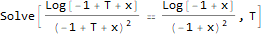

In [14]:
Solve[f[x+T] == f[x], T]

Solve не выдает ни одного решения, следовательно ни при каком значении T не будет f[x+T] = f[x], следовательно функция не является переодической.

# Точки пересечения с осями координат

In [15]:
sols = Solve[f[x] == 0, x];
points = {x, 0} /. sols;

-Graphics-
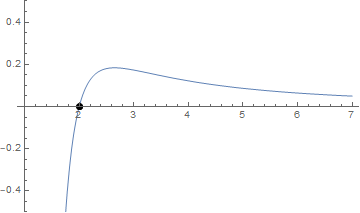

In [17]:
g1 = Plot[f[x], {x, 0, 7}, PlotRange->{-0.5,0.5}];
g2 = ListPlot[points, PlotStyle->{Black, PointSize[Large]}];
Show[{g1, g2}]

# Промежутуки знакопостоянства

In [20]:
f[2]
f[1.5]
f[2.5]

0
-2.77259
0.180207

-Graphics-
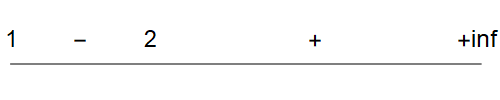

In [23]:
g1 = Graphics[Line[{{0,0}, {20,0}}]];
g2 = Graphics[Text[Style["1", 24], {0.1, 1}]];
g3 = Graphics[Text[Style["2", 24], {6, 1}]];
g4 = Graphics[Text[Style["+inf", 24], {19.9, 1}]];
g5 = Graphics[Text[Style["+", 24], {13, 1}]];
g6 = Graphics[Text[Style["-", 24], {3, 1}]];
Show[{g1, g2, g3, g4, g5, g6}, ImageSize->{500, 100}]

# Промежутки возрастания и убывания

{{1 + Sqrt[E]}}
   1
{{---}}
  2 E
{{0.0336883}}
{{-0.0220228}}
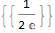

In [30]:
sols = Solve[f'[x] == 0, x];
points = {x} /. sols
f[points]
f'[N[points]-0.1]
f'[N[points]+0.1]

-Graphics-
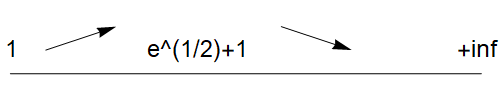

In [35]:
g1 = Graphics[Line[{{0,0}, {20,0}}]];
g2 = Graphics[Text[Style["1", 24], {0.1, 1}]];
g3 = Graphics[Text[Style["e^(1/2)+1", 24], {8, 1}]];
g4 = Graphics[Text[Style["+inf", 24], {19.9, 1}]];
g5 = Graphics[Arrow[{{1.5,1}, {4.5,2}}]];
g6 = Graphics[Arrow[{{11.5,2}, {14.5,1}}]];
Show[{g1, g2, g3, g4, g5, g6}, ImageSize->{500, 100}]

# Точки экстремума и значения в этих точках

Из предыдущего пункта видно, что точка {1+sqrt(e), 1/2e} - точка глобального максимума.

# Непрерывность. Наличие точек разрыва и их классификация

In [42]:
Limit[f[x], x->1]

-Infinity

Точка x=1 является точкой разрыва второго рода. Во всех точках D функция непрерывна.

# Асимптоты

In [43]:
k1 = Limit[f[x], x->+\[Infinity]];
k2 = Limit[f[x], x->-\[Infinity]];
b1 = Limit[f[x]-k1*x, x->+\[Infinity]];
b2 = Limit[f[x]-k2*x, x->+\[Infinity]];
Print["k1 = ", k1, " b1 = ", b1, " k2 = ", k2, " b2 = ", b2]

k1 = 0 b1 = 0 k2 = 0 b2 = 0


Т.к. b1=b2, k1=k2, то это одна горизонтальная асимптота y=0, теперь необходимо посмотреть точки разрыва. 

In [48]:
Limit[f[x], x->1]

-Infinity

Т.к. предел равен -inf, x=1 является вертикальной асимптотой. 

-Graphics-
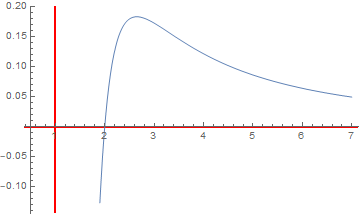

In [49]:
Plot[f[x], {x, 0.5, 7}, GridLines->{{1,0},{0,0}}, GridLinesStyle->Directive[Thick, Red]]